# Understanding the dynamics of cities through people's mobility

## Contact Networks

In [1]:
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from utils import get_subset, get_network
import network_features as nf

In [2]:
SMALL_SIZE  = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size        = MEDIUM_SIZE)   # controls default text sizes
plt.rc('axes', titlesize   = SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize   = MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize  = SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize  = SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize  = SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)   # fontsize of the figure title

## Data exploration

In [8]:
br_checkin = pd.read_csv("br_checkin.csv")

sp_days   = get_subset(br_checkin, "Sao Paulo", time = "diary")
sp_months = get_subset(br_checkin, "Sao Paulo", time = "monthly")

#### Features já tiradas
sp_fdays2012   = pd.read_csv("contact_features/SP_network_features2012_isolates_days.csv", index_col = 0)
sp_fdays2013   = pd.read_csv("contact_features/SP_network_features2013_isolates_days.csv", index_col = 0)

sp_fmonths2012 = pd.read_csv("contact_features/SP_network_features2012_isolates_months.csv", index_col = 0)
sp_fmonths2013 = pd.read_csv("contact_features/SP_network_features2013_isolates_months.csv", index_col = 0)

sp_gdays2013   = get_network(sp_days, "2012", features = False, remove_selfloop = True, remove_isolates = False)
sp_gdays2013   = get_network(sp_days, "2013", features = False, remove_selfloop = True, remove_isolates = False)

sp_gmonths2012 = get_network(sp_months, "2012", features = False, remove_selfloop = True, remove_isolates = False)
sp_gmonths2013 = get_network(sp_months, "2013", features = False, remove_selfloop = True, remove_isolates = False)

In [9]:
jp_checkin = pd.read_csv("jp_checkin.csv")

tk_days   = get_subset(jp_checkin, "Tokyo", time = "diary")
tk_months = get_subset(jp_checkin, "Tokyo", time = "monthly")

#### Features já tiradas
tk_fdays2012   = pd.read_csv("contact_features/TK_network_features2012_isolates_days.csv", index_col = 0)
tk_fdays2013   = pd.read_csv("contact_features/TK_network_features2013_isolates_days.csv", index_col = 0)

tk_fmonths2012 = pd.read_csv("contact_features/TK_network_features2012_isolates_months.csv", index_col = 0)
tk_fmonths2013 = pd.read_csv("contact_features/TK_network_features2013_isolates_months.csv", index_col = 0)

tk_gdays2013   = get_network(tk_days, "2012", features = False, remove_selfloop = True, remove_isolates = False)
tk_gdays2013   = get_network(tk_days, "2013", features = False, remove_selfloop = True, remove_isolates = False)

tk_gmonths2012 = get_network(tk_months, "2012", features = False, remove_selfloop = True, remove_isolates = False)
tk_gmonths2013 = get_network(tk_months, "2013", features = False, remove_selfloop = True, remove_isolates = False)

In [10]:
us_checkin = pd.read_csv("us_checkin.csv")

nyc_days   = get_subset(us_checkin, "New York", time = "diary")
nyc_months = get_subset(us_checkin, "New York", time = "monthly")

#### Features já tiradas
nyc_fdays2012   = pd.read_csv("contact_features/NYC_network_features2012_isolates_days.csv", index_col = 0)
nyc_fdays2013   = pd.read_csv("contact_features/NYC_network_features2013_isolates_days.csv", index_col = 0)

nyc_fmonths2012 = pd.read_csv("contact_features/NYC_network_features2012_isolates_months.csv", index_col = 0)
nyc_fmonths2013 = pd.read_csv("contact_features/NYC_network_features2013_isolates_months.csv", index_col = 0)

nyc_gdays2013   = get_network(nyc_days, "2012", features = False, remove_selfloop = True, remove_isolates = False)
nyc_gdays2013   = get_network(nyc_days, "2013", features = False, remove_selfloop = True, remove_isolates = False)

nyc_gmonths2012 = get_network(nyc_months, "2012", features = False, remove_selfloop = True, remove_isolates = False)
nyc_gmonths2013 = get_network(nyc_months, "2013", features = False, remove_selfloop = True, remove_isolates = False)

In [11]:
nyc_twoyears = pd.concat([nyc_fmonths2012, nyc_fmonths2013], axis = 0)

tk_twoyears = pd.concat([tk_fmonths2012, tk_fmonths2013], axis = 0)

sp_twoyears = pd.concat([sp_fmonths2012, sp_fmonths2013], axis = 0)

Text(0.5, 1.0, 'Contact Network - São Paulo')

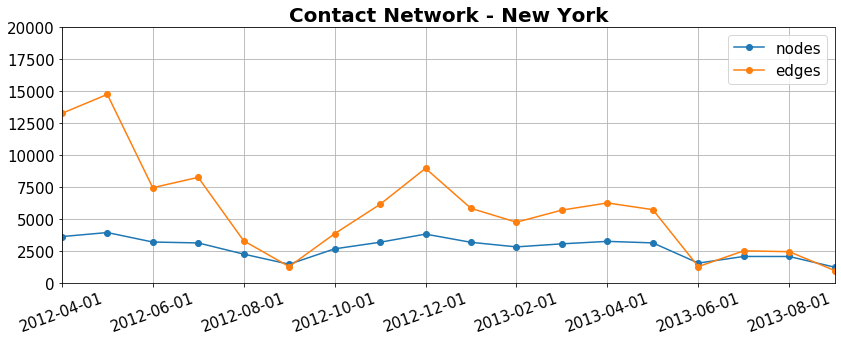

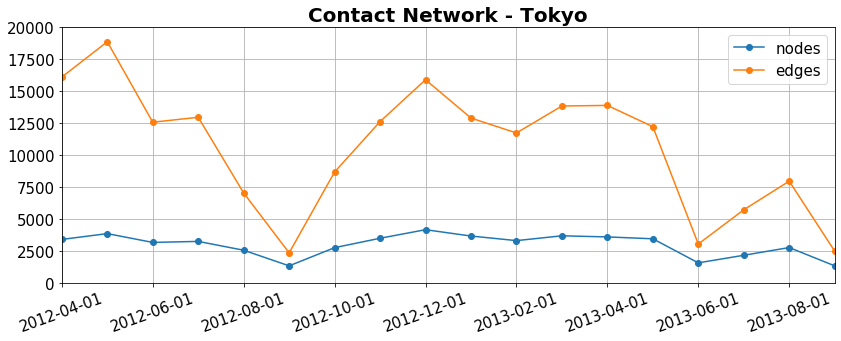

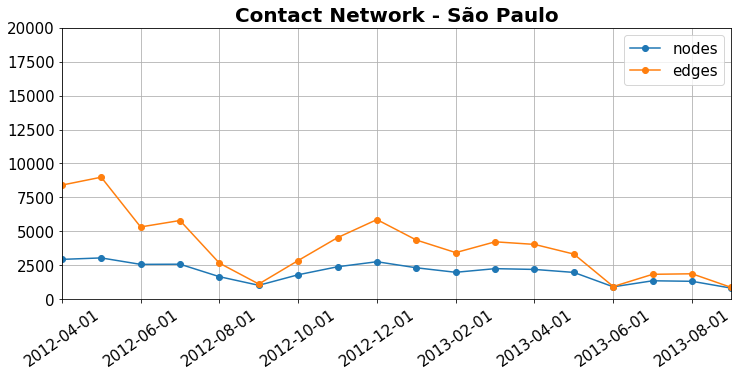

In [12]:
# fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize = (30, 10), squeeze = False)

ax1 = nyc_twoyears[["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-', rot = 20)#, ax = axes[0,0])
ax1.grid(True)
ax1.set_ylim(0, 20000)
ax1.set_title("Contact Network - New York", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/contact/nyc_nodes_edges.pdf")
######

ax2 = tk_twoyears[["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-', rot = 20)#, ax = axes[1,0])
ax2.grid(True)
ax2.set_ylim(0, 20000)
ax2.set_title("Contact Network - Tokyo", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/contact/tyk_nodes_edges.pdf")
######

ax3 = sp_twoyears[["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-', rot = 35)#, rot = 45, ax = axes[2,0])
ax3.grid(True)
ax3.set_ylim(0, 20000)
ax3.set_title("Contact Network - São Paulo", fontweight = "bold", fontsize = 20)

## Por que esse pico em maio de 2012?

Text(0.5, 1.0, 'Contact Network - São Paulo - March 2012')

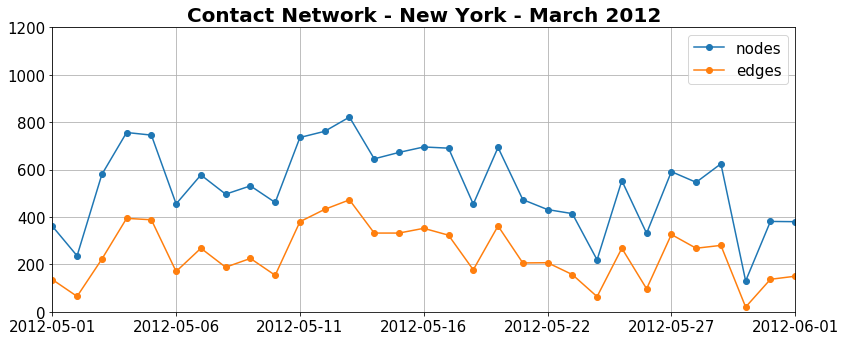

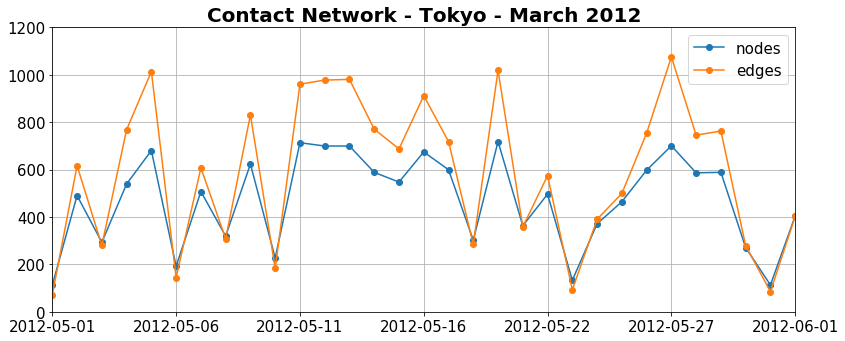

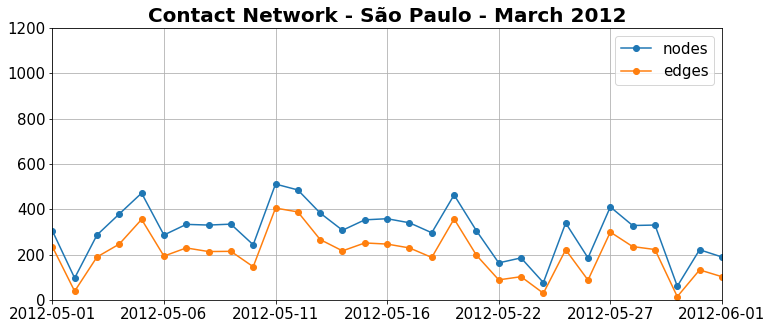

In [13]:
ax1 = nyc_fdays2012[(nyc_fdays2012.index >= "2012-05-01") & (nyc_fdays2012.index <= "2012-06-01")][["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-')
ax1.grid(True)
ax1.set_ylim(0, 1200)
ax1.set_title("Contact Network - New York - March 2012", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/contact/nyc_nodes_edges_month_contact.pdf")
######

ax2 = tk_fdays2012[(tk_fdays2012.index >= "2012-05-01") & (tk_fdays2012.index <= "2012-06-01")][["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-')
ax2.grid(True)
ax2.set_ylim(0, 1200)
ax2.set_title("Contact Network - Tokyo - March 2012", fontweight = "bold", fontsize = 20)

plt.tight_layout()
plt.savefig("plots/contact/tyk_nodes_edges_month_contact.pdf")
######

ax3 = sp_fdays2012[(sp_fdays2012.index >= "2012-05-01") & (sp_fdays2012.index <= "2012-06-01")][["nodes", "edges"]].plot(figsize = (12, 5), style = 'o-')
ax3.grid(True)
ax3.set_ylim(0, 1200)
ax3.set_title("Contact Network - São Paulo - March 2012", fontweight = "bold", fontsize = 20)

In [14]:
tk_days[(tk_days["Date"] == "May 13 2012")].groupby(by = ["VenueName", "Latitude", "Longitude"]).count().sort_values(by = "UserID", ascending = False)[:5]

UserID  VenueID  CountryCode  City  Date
VenueName     Latitude  Longitude                                           
Train Station 35.698596 139.773018     166      166          166   166   166
              35.690803 139.700279     136      136          136   136   136
              35.658522 139.701326      73       73           73    73    73
              35.729865 139.710956      67       67           67    67    67
              35.681379 139.766082      53       53           53    53    53

In [15]:
nyc_days[(nyc_days["Date"] == "May 13 2012")].groupby(by = ["VenueName", "Latitude", "Longitude"]).count().sort_values(by = "UserID", ascending = False)[:5]

,,,UserID,VenueID,CountryCode,City,Date
VenueName,Latitude,Longitude,,,,,
Pub,40.741002,-73.981709,115,115,115,115,115
Airport,40.645089,-73.784523,35,35,35,35,35
Train Station,40.750795,-73.993576,22,22,22,22,22
Baseball Stadium,40.829491,-73.926938,19,19,19,19,19
Train Station,40.752806,-73.977175,16,16,16,16,16


In [16]:
sp_days[(sp_days["Date"] == "May 13 2012")].groupby(by = ["VenueName", "Latitude", "Longitude"]).count().sort_values(by = "UserID", ascending = False)[:5]

UserID  VenueID  CountryCode  City  Date
VenueName      Latitude   Longitude                                           
Airport        -23.625967 -46.658721      45       45           45    45    45
Soccer Stadium -23.600115 -46.720095      29       29           29    29    29
Bakery         -23.556400 -46.659987      16       16           16    16    16
Mall           -23.623372 -46.698976      14       14           14    14    14
               -23.570824 -46.643595      10       10           10    10    10

In [27]:
tk_fmonths2012

,nodes,edges,density,subgraphs,biggest_component,assortativity,diameter,max_degree,min_degree,std_degree,...,mean_eccentricity,std_eccentricity,max_betweenness,min_betweenness,mean_betweenness,std_betweenness,max_eigenvector,min_eigenvector,mean_eigenvector,std_eigenvector
2012-04-01,3395.0,16099.0,0.002794,56.0,3335.0,0.027891,11.0,208.0,0.0,10.874816,...,7.999400,0.671099,0.036145,0.0,0.000804,0.002135,0.253153,-1.918246e-18,0.007529,0.015423
2012-05-01,3850.0,18862.0,0.002546,62.0,3783.0,0.034897,10.0,223.0,0.0,11.179740,...,7.118953,0.585866,0.047728,0.0,0.000707,0.001969,0.293152,-4.062846e-18,0.006665,0.014674
2012-06-01,3161.0,12565.0,0.002516,78.0,3069.0,0.050684,11.0,166.0,0.0,9.030054,...,7.817204,0.670189,0.039843,0.0,0.000932,0.002369,0.236084,-2.403913e-18,0.007597,0.016082
2012-07-01,3241.0,12952.0,0.002467,61.0,3166.0,0.020541,11.0,200.0,0.0,8.984881,...,7.628869,0.663773,0.044192,0.0,0.000889,0.002558,0.353681,-1.692198e-18,0.006931,0.016140
2012-08-01,2550.0,7031.0,0.002163,78.0,2452.0,0.011291,11.0,63.0,0.0,5.754510,...,8.131729,0.741029,0.046497,0.0,0.001339,0.003061,0.350771,-4.977176e-18,0.008999,0.017640
2012-09-01,1328.0,2344.0,0.002660,88.0,1229.0,-0.003942,13.0,37.0,0.0,3.658133,...,9.363710,0.861632,0.088884,0.0,0.003305,0.006787,0.408890,-1.139523e-17,0.010127,0.025504
2012-10-01,2751.0,8671.0,0.002292,75.0,2661.0,0.028825,12.0,128.0,0.0,6.832425,...,8.187899,0.687039,0.045347,0.0,0.001157,0.002959,0.428529,-2.183258e-18,0.007025,0.017724
2012-11-01,3487.0,12613.0,0.002075,55.0,3421.0,0.022129,12.0,242.0,0.0,7.899627,...,8.822567,0.726839,0.078721,0.0,0.000866,0.002732,0.488589,-2.297298e-18,0.005712,0.015942
2012-12-01,4156.0,15891.0,0.001840,64.0,4084.0,0.011578,12.0,202.0,0.0,8.195861,...,8.330803,0.709541,0.050798,0.0,0.000725,0.002080,0.404790,-3.789607e-18,0.005868,0.014359


### Plotando a distribuição dos graus dos grafos

In [22]:
def degree_sequence(lgraphs):
    dg = []

    for date, graph in lgraphs:
        degree_sequence = sorted([d for n, d in graph.degree(weight = 'weight')], reverse = True)
        degreeCount = collections.Counter(degree_sequence)

        dg.append((date, degreeCount))
        
    return dg


def plot_graphs(lgraphs, city, ylim = None):
    
    dg = degree_sequence(lgraphs)
        
    for date, degree in dg:
        df = pd.DataFrame.from_dict(degree, orient = "index")
        ax = df.plot(kind = 'bar', legend = False, figsize = (12, 5))
        ax.invert_xaxis()

        ax.set_title(f'Contact Network - {city} - {date}', fontweight = "bold", fontsize = 20)
        
        if ylim != None:
            ax.set_ylim(ylim)

        tick_custom = df.index 
        plt.xticks(np.arange(len(tick_custom))[::10], tick_custom[::10], rotation = 0)
        
        filename = f"{city}_weight_{date}_contact.pdf"
        plt.tight_layout()
        plt.savefig("plots/contact/" + filename)

In [15]:
def get_people_weight(graph, data, k):
    dg = sorted([d for n, d in graph.degree(weight = 'weight')], reverse = True)
    
    degrees = dg[:k]
    
    places = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Weight"])
    
    for deg in degrees:
        dg_node = [n for n, d in graph.degree(weight = 'weight') if d == deg][0]
        p = data[data["UserID"] == dg_node].iloc[0, :]
        
        places = places.append({"UserID": p["UserID"], "Latitude": p["Latitude"], "Longitude": p["Longitude"], 
                                "VenueID": p["VenueID"], "VenueName": p["VenueName"], 
                               "Weight": deg}, ignore_index = True)
        
    return places

In [16]:
tk_weight = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Weight", "Date"])

for date, graph in tk_gmonths2012:
    p = get_people_weight(graph, tk_months, k = 5)
    
    for i in range(len(p)):
        tk_weight = tk_weight.append({"UserID": p["UserID"][i], "Latitude": p["Latitude"][i], 
                                      "Longitude": p["Longitude"][i], "VenueID": p["VenueID"][i], 
                                      "VenueName": p["VenueName"][i], 
                                   "Weight": p["Weight"][i], "Date": date}, ignore_index = True)

In [17]:
nyc_weight = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Weight", "Date"])

for date, graph in nyc_gmonths2012:
    p = get_people_weight(graph, nyc_months, k = 5)
    
    for i in range(len(p)):
        nyc_weight = nyc_weight.append({"UserID": p["UserID"][i], "Latitude": p["Latitude"][i], 
                                      "Longitude": p["Longitude"][i], "VenueID": p["VenueID"][i], 
                                      "VenueName": p["VenueName"][i], 
                                        "Weight": p["Weight"][i], "Date": date}, ignore_index = True)

In [18]:
for d, g in tk_gmonths2012:
    
    print("----------" , d)

    user = tk_weight[tk_weight["Date"] == d]

    n1 = (0, 0)
    n2 = (0, 0)
    
#     print(g[user["UserID"].iloc[0]])

    for k, v in dict(g[user["UserID"].iloc[0]]).items():
        w = v['weight']

        if w > n1[1]:
            n1 = (k, w)

    for k, v in dict(g[user["UserID"].iloc[0]]).items():
        w = v['weight']

        if w < n1[1] and w > n2[1]:
            n2 = (k, w)


    print(n1, n2)


    u1 = tk_months[(tk_months["UserID"] == user["UserID"].iloc[0]) & (tk_months["Date"] == d)]
    u2 = tk_months[(tk_months["UserID"] == n1[0]) & (tk_months["Date"] == d)]
    u3 = tk_months[(tk_months["UserID"] == n2[0]) & (tk_months["Date"] == d)]


    print("{} and {}".format(user["UserID"].iloc[0], n1[0]))
    pp = u1.VenueID.isin(u2.VenueID)

    places = pd.DataFrame()
    for p, i in zip(pp, pp.index):
        if p == True:
            places = pd.concat([places, u1[u1.index == i]], axis = 0)

    print(places[["Latitude", "Longitude", "VenueName"]])

    print("{} and {}".format(user["UserID"].iloc[0], n2[0]))
    pp = u1.VenueID.isin(u3.VenueID)

    places = pd.DataFrame()
    for p, i in zip(pp, pp.index):
        if p == True:
            places = pd.concat([places, u1[u1.index == i]], axis = 0)

    print(places[["Latitude", "Longitude", "VenueName"]])

---------- Aug 2012
(3658, 2) (1135, 1)
121 and 3658
        Latitude   Longitude      VenueName
74551  35.698596  139.773018  Train Station
74558  35.712858  139.776168  Train Station
74987  35.698596  139.773018  Train Station
75009  35.712858  139.776168  Train Station
75321  35.698596  139.773018  Train Station
75599  35.698596  139.773018  Train Station
75621  35.712858  139.776168  Train Station
76564  35.698596  139.773018  Train Station
76643  35.698596  139.773018  Train Station
76682  35.712858  139.776168  Train Station
77334  35.712858  139.776168  Train Station
77339  35.698596  139.773018  Train Station
77701  35.698596  139.773018  Train Station
77739  35.698596  139.773018  Train Station
78730  35.698596  139.773018  Train Station
78898  35.712858  139.776168  Train Station
79179  35.698596  139.773018  Train Station
79181  35.712858  139.776168  Train Station
79735  35.698596  139.773018  Train Station
80013  35.712858  139.776168  Train Station
80016  35.698596  139.7

        Latitude   Longitude      VenueName
917    35.701708  139.985218  Train Station
1099   35.701708  139.985218  Train Station
1290   35.701708  139.985218  Train Station
2827   35.701708  139.985218  Train Station
3089   35.701708  139.985218  Train Station
3139   35.701708  139.985218  Train Station
3943   35.701708  139.985218  Train Station
4767   35.701708  139.985218  Train Station
5692   35.701708  139.985218  Train Station
5741   35.701708  139.985218  Train Station
5882   35.701708  139.985218  Train Station
6589   35.701708  139.985218  Train Station
6797   35.701708  139.985218  Train Station
6802   35.707449  139.959093  Train Station
7389   35.701708  139.985218  Train Station
8186   35.701708  139.985218  Train Station
9409   35.701708  139.985218  Train Station
9496   35.701708  139.985218  Train Station
10388  35.701708  139.985218  Train Station
10463  35.701708  139.985218  Train Station
11500  35.701708  139.985218  Train Station
11547  35.701708  139.985218  Tr

1336 and 1318
        Latitude   Longitude      VenueName
43110  35.698596  139.773018  Train Station
43274  35.705829  139.665799  Train Station
43950  35.705829  139.665799  Train Station
44209  35.705829  139.665799  Train Station
44285  35.705829  139.665799  Train Station
44314  35.698596  139.773018  Train Station
46269  35.698596  139.773018  Train Station
46293  35.690803  139.700279  Train Station
46473  35.705829  139.665799  Train Station
46488  35.698596  139.773018  Train Station
47338  35.705829  139.665799  Train Station
47435  35.705829  139.665799  Train Station
47772  35.705829  139.665799  Train Station
47941  35.705829  139.665799  Train Station
47952  35.698596  139.773018  Train Station
48688  35.690803  139.700279  Train Station
49334  35.698596  139.773018  Train Station
49367  35.690803  139.700279  Train Station
49940  35.705829  139.665799  Train Station
50708  35.705829  139.665799  Train Station
50799  35.705829  139.665799  Train Station
50811  35.690803  

In [19]:
for d, g in nyc_gmonths2012:
    
    print("----------" , d)

    user = nyc_weight[nyc_weight["Date"] == d]

    n1 = (0, 0)
    n2 = (0, 0)
    
#     print(g[user["UserID"].iloc[0]])

    for k, v in dict(g[user["UserID"].iloc[0]]).items():
        w = v['weight']

        if w > n1[1]:
            n1 = (k, w)

    for k, v in dict(g[user["UserID"].iloc[0]]).items():
        w = v['weight']

        if w < n1[1] and w > n2[1]:
            n2 = (k, w)


    print(n1, n2)


    u1 = nyc_months[(nyc_months["UserID"] == user["UserID"].iloc[0]) & (nyc_months["Date"] == d)]
    u2 = nyc_months[(nyc_months["UserID"] == n1[0]) & (nyc_months["Date"] == d)]
    u3 = nyc_months[(nyc_months["UserID"] == n2[0]) & (nyc_months["Date"] == d)]


    print("{} and {}".format(user["UserID"].iloc[0], n1[0]))
    pp = u1.VenueID.isin(u2.VenueID)

    places = pd.DataFrame()
    for p, i in zip(pp, pp.index):
        if p == True:
            places = pd.concat([places, u1[u1.index == i]], axis = 0)

    print(places[["Latitude", "Longitude", "VenueName"]])

    print("{} and {}".format(user["UserID"].iloc[0], n2[0]))
    pp = u1.VenueID.isin(u3.VenueID)

    places = pd.DataFrame()
    for p, i in zip(pp, pp.index):
        if p == True:
            places = pd.concat([places, u1[u1.index == i]], axis = 0)

    print(places[["Latitude", "Longitude", "VenueName"]])

---------- Aug 2012
(1437, 4) (82657, 3)
1006 and 1437
        Latitude  Longitude VenueName
74219  40.737434 -73.991281       Bar
76723  40.737434 -73.991281       Bar
79822  40.737434 -73.991281       Bar
1006 and 82657
        Latitude  Longitude VenueName
73886  40.762245 -73.979287     Hotel
74337  40.762245 -73.979287     Hotel
74454  40.762245 -73.979287     Hotel
75070  40.762245 -73.979287     Hotel
75725  40.762245 -73.979287     Hotel
75796  40.762245 -73.979287     Hotel
76366  40.762245 -73.979287     Hotel
76434  40.762245 -73.979287     Hotel
77268  40.762245 -73.979287     Hotel
77403  40.762245 -73.979287     Hotel
78304  40.762245 -73.979287     Hotel
78761  40.762245 -73.979287     Hotel
79342  40.762245 -73.979287     Hotel
---------- Nov 2012
(1437, 6) (35412, 3)
1006 and 1437
        Latitude  Longitude VenueName
93112  40.737434 -73.991281       Bar
93753  40.737434 -73.991281       Bar
95958  40.737434 -73.991281       Bar
98970  40.737434 -73.991281       Bar
9

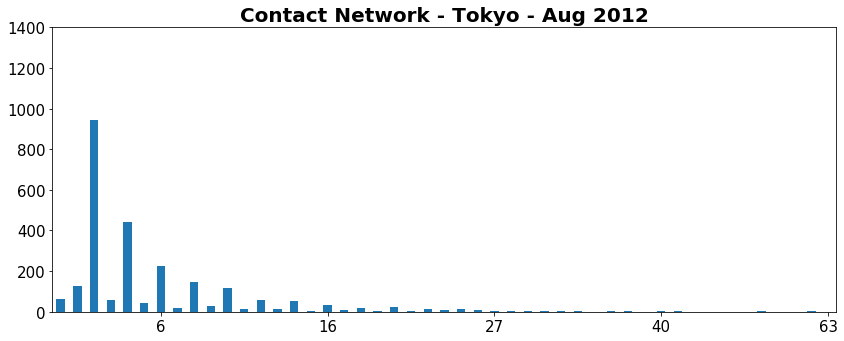

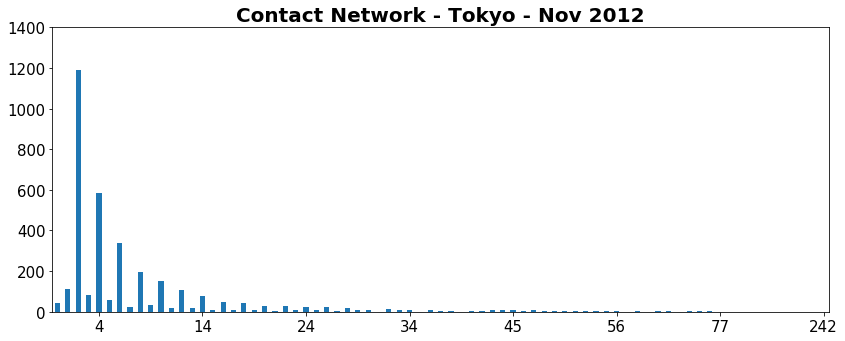

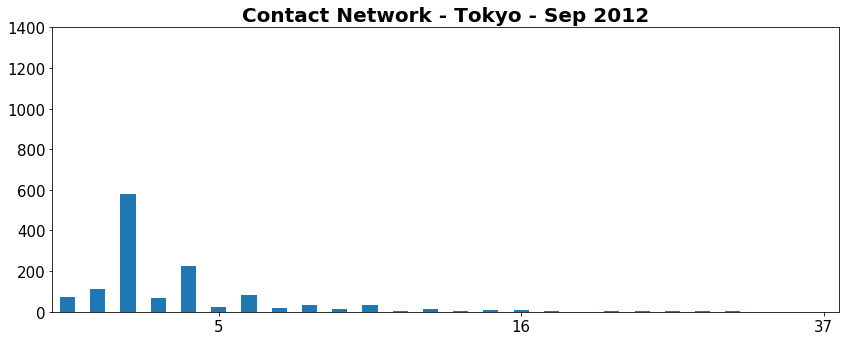

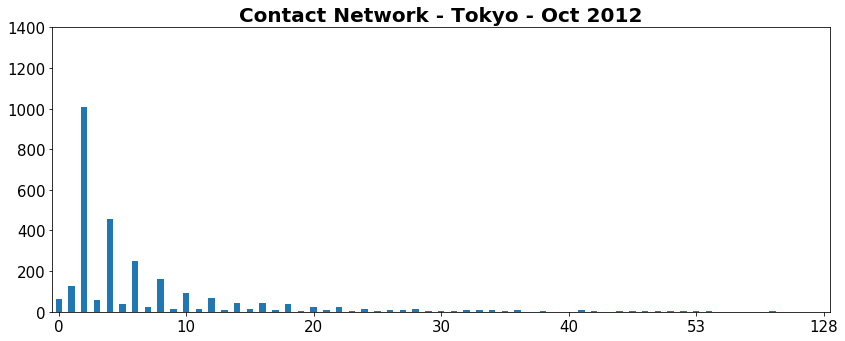

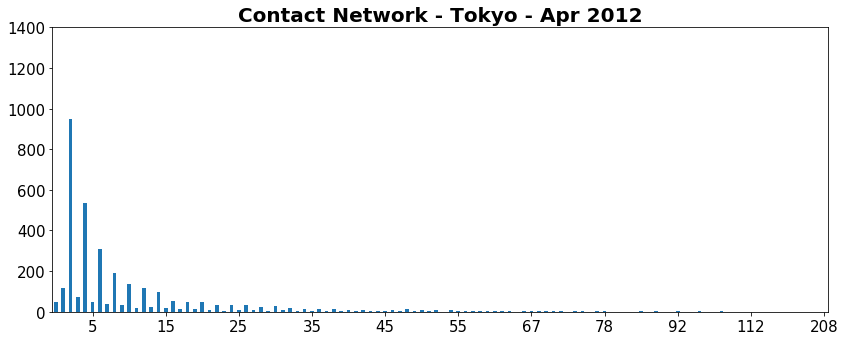

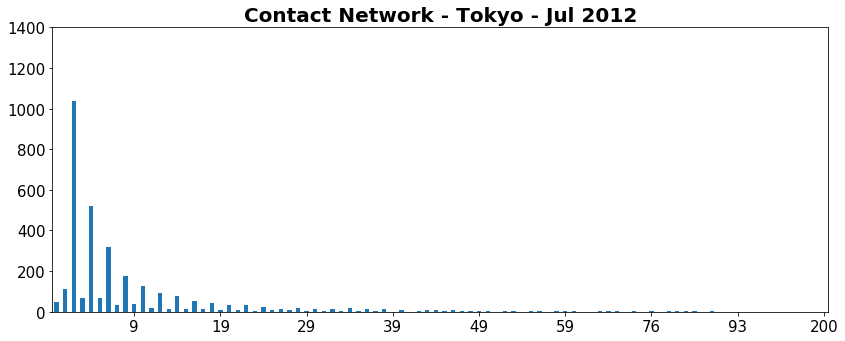

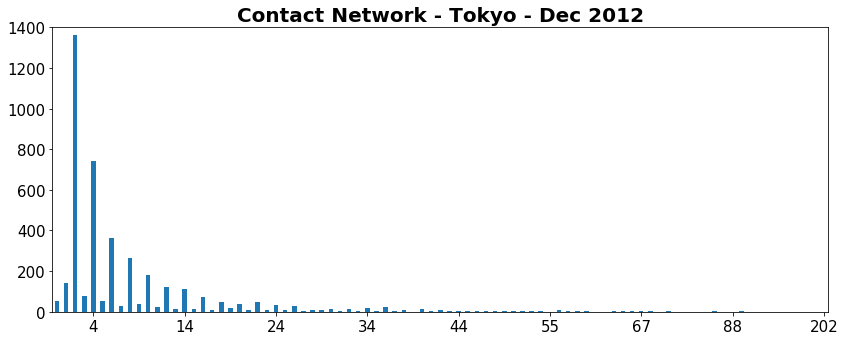

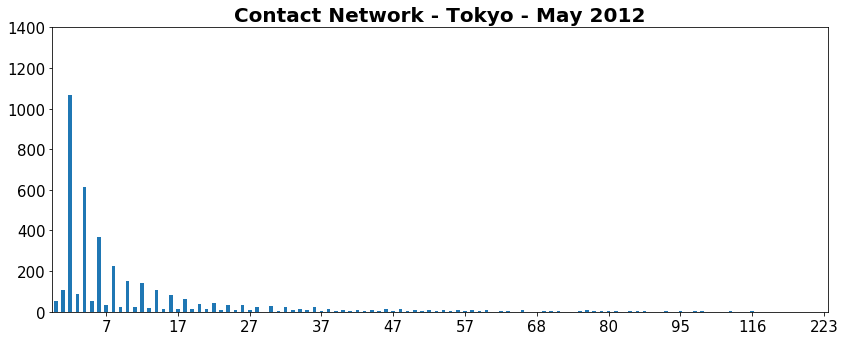

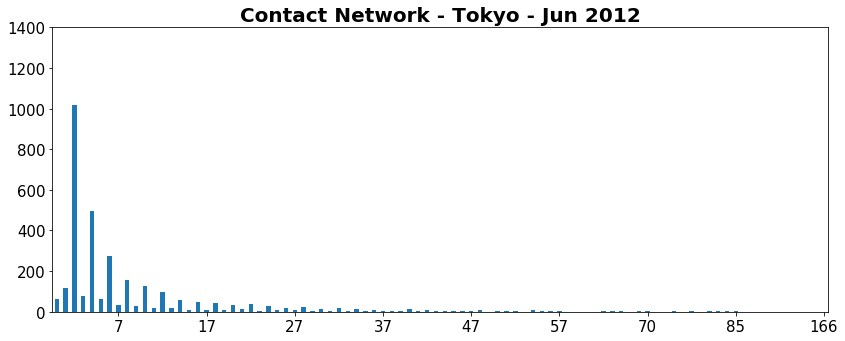

In [23]:
plot_graphs(tk_gmonths2012, "Tokyo", ylim = (0, 1400))

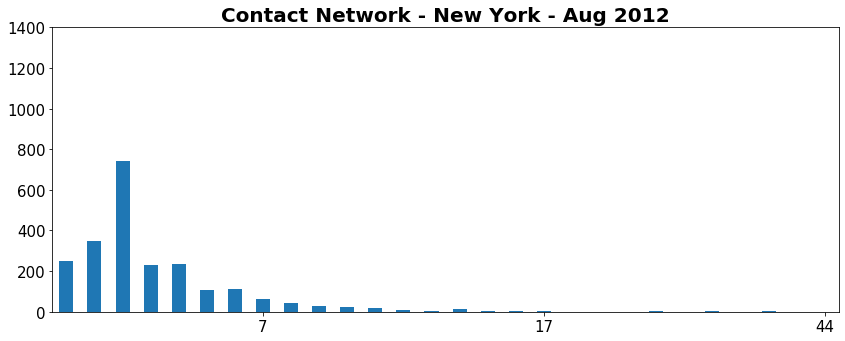

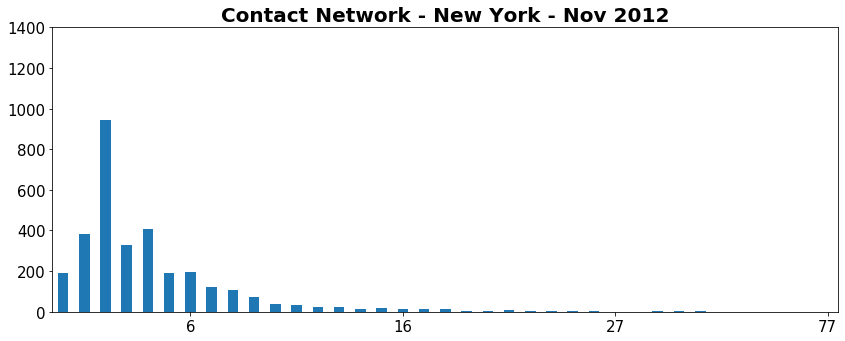

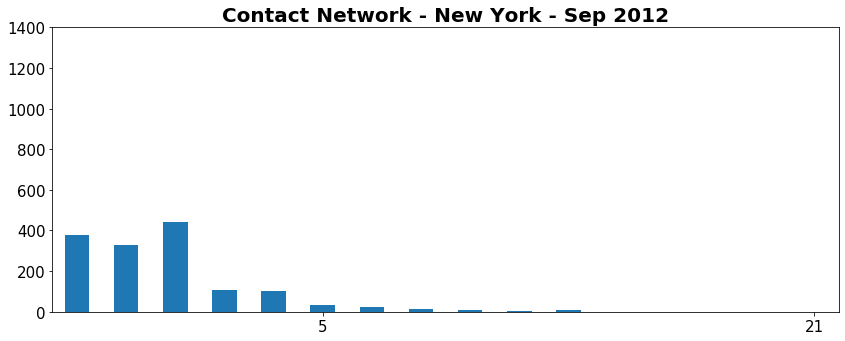

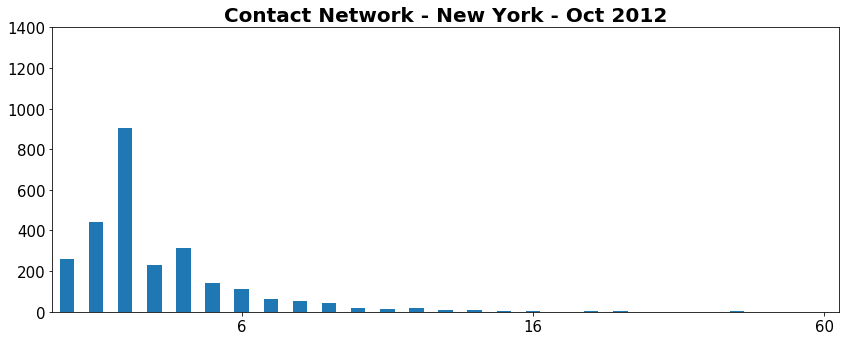

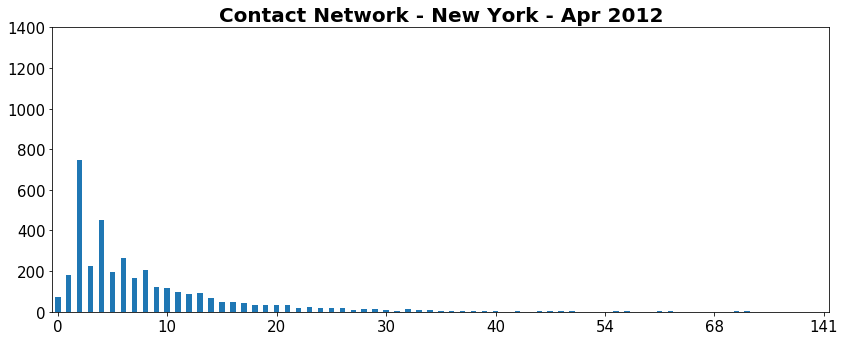

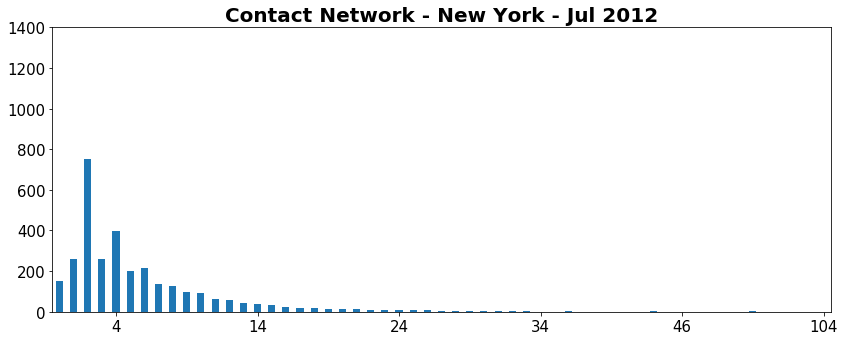

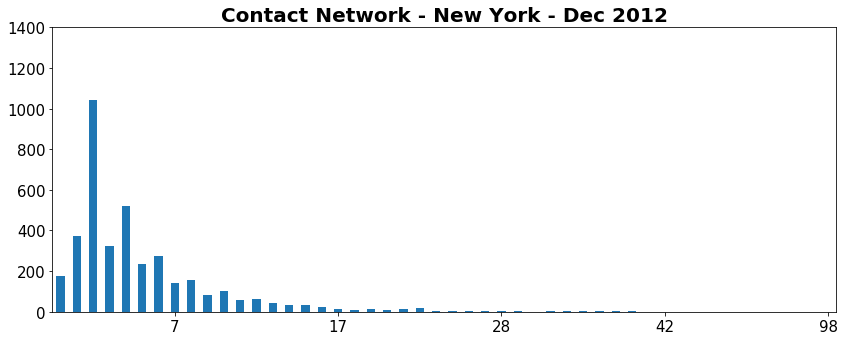

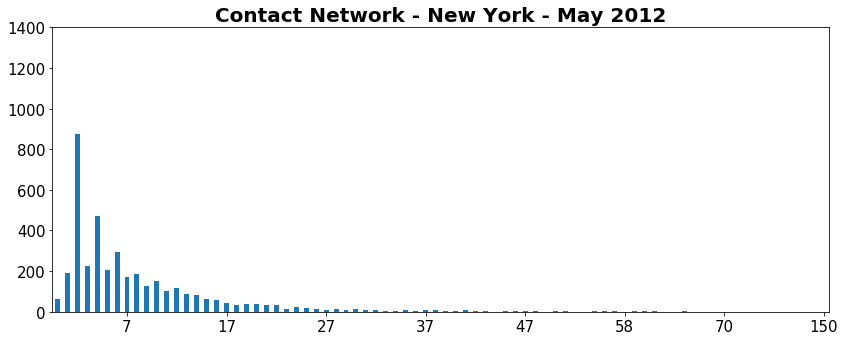

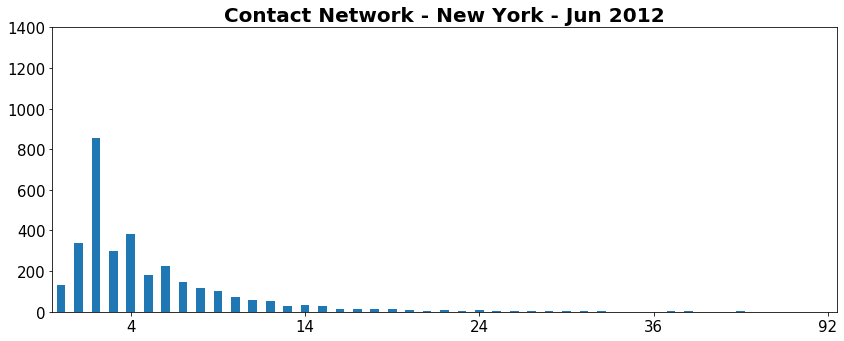

In [24]:
plot_graphs(nyc_gmonths2012, "New York", ylim = (0, 1400))

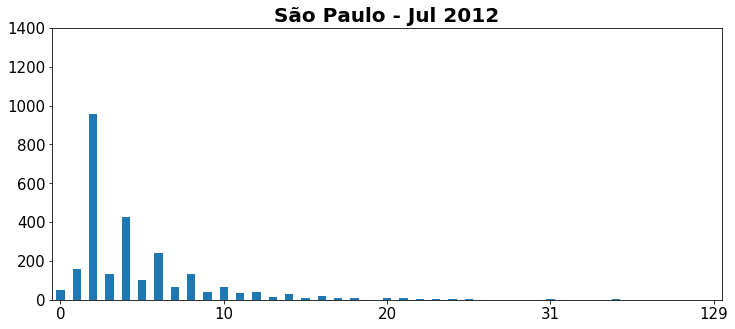

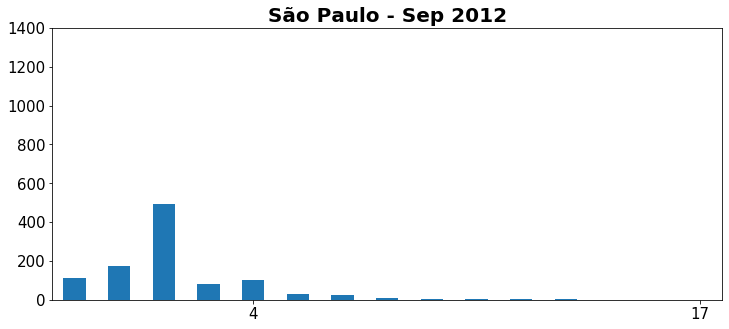

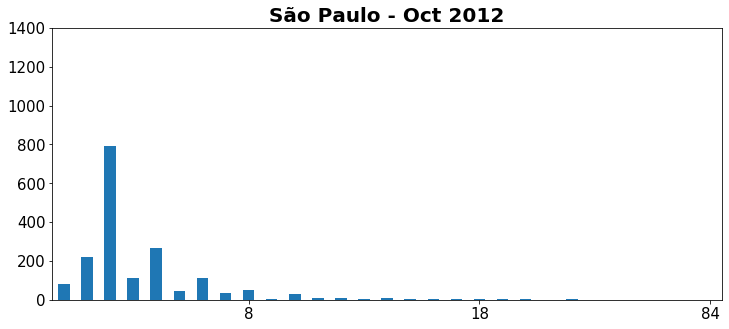

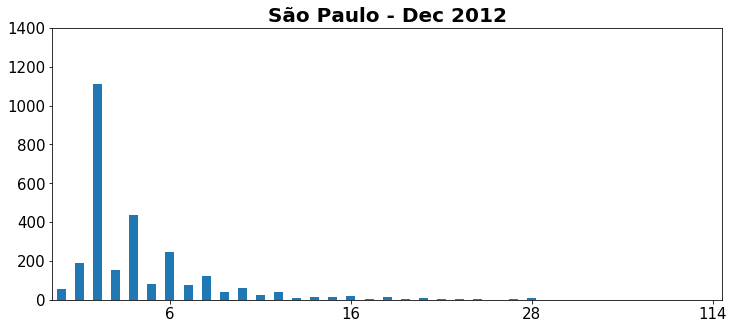

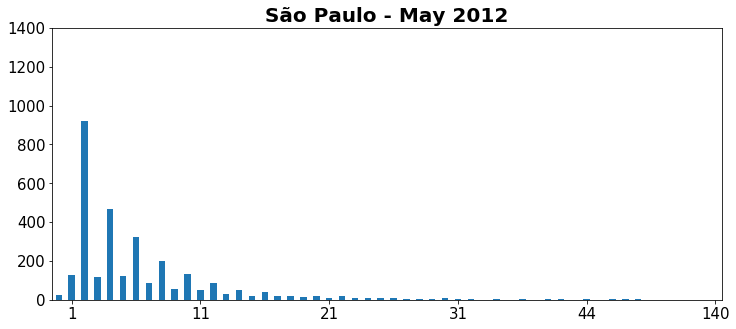

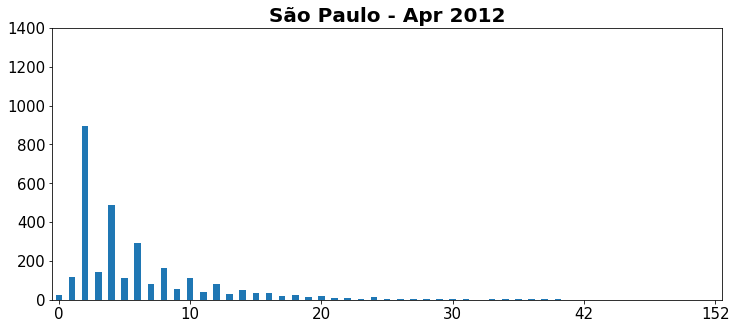

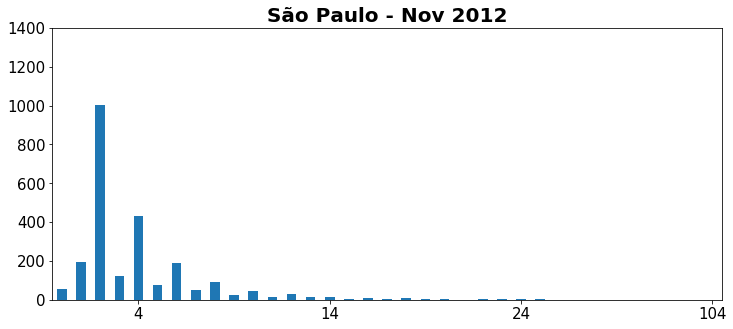

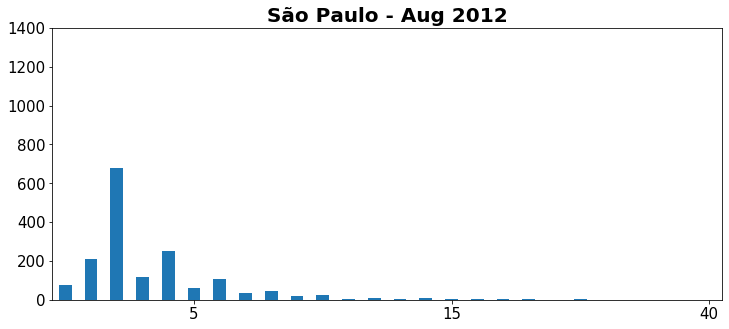

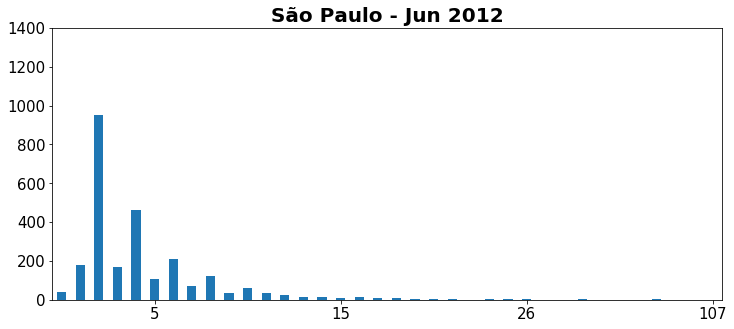

In [20]:
plot_graphs(sp_gmonths2012, "São Paulo", ylim = (0, 1400))

### Subgraphs and connected components

In [75]:
def plot_components(city, data):
    
    components             = data[["biggest_component", "nodes"]]
    components["isolated"] = (data["nodes"] - data["biggest_component"])
    
    index = [str(p).split(" ")[0] for p in data.index]
    
    ax = components[["biggest_component", "isolated"]].plot(kind = "bar", figsize = (12, 5), stacked = True, rot = 45)
    
    plt.xticks(range(len(components)), index)
    
#     ax.legend(loc="lower left")
    ax.set_ylim(0, 5000)
    
    ax.set_title(city, fontweight = "bold", fontsize = 20)

/home/isadora/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


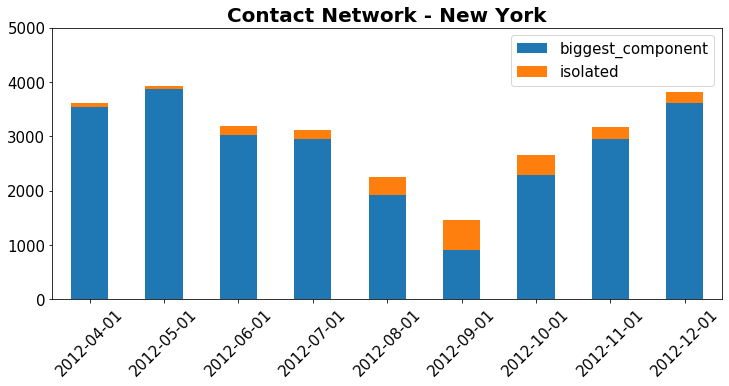

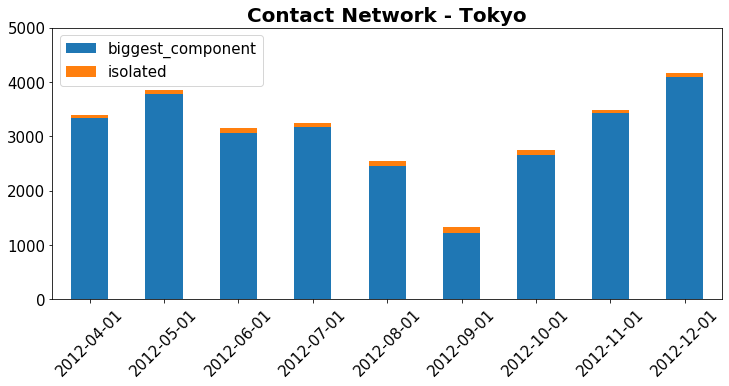

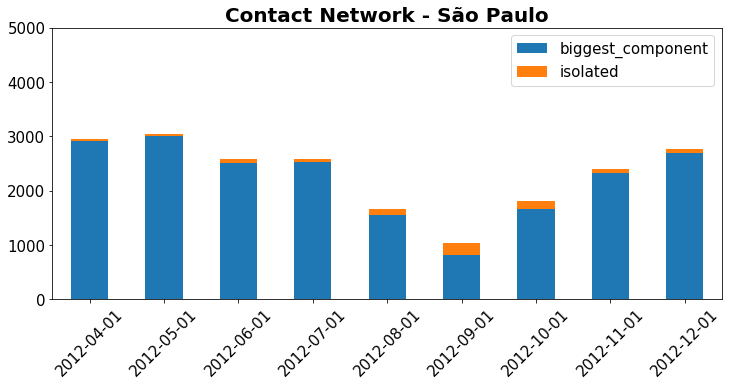

In [76]:
plot_components("Contact Network - New York", nyc_fmonths2012)

plot_components("Contact Network - Tokyo", tk_fmonths2012)

plot_components("Contact Network - São Paulo", sp_fmonths2012)

In [37]:
nx.write_gexf(tk_gmonths2012[2][1], "may2012_contact.gexf")

In [33]:
tk_fmonths2012["subgraphs"]

2012-04-01    56.0
2012-05-01    62.0
2012-06-01    78.0
2012-07-01    61.0
2012-08-01    78.0
2012-09-01    88.0
2012-10-01    75.0
2012-11-01    55.0
2012-12-01    64.0
Name: subgraphs, dtype: float64

In [28]:
tk_fmonths2012["biggest_component"]/tk_fmonths2012["nodes"]

2012-04-01    0.982327
2012-05-01    0.982597
2012-06-01    0.970895
2012-07-01    0.976859
2012-08-01    0.961569
2012-09-01    0.925452
2012-10-01    0.967285
2012-11-01    0.981073
2012-12-01    0.982676
dtype: float64

In [27]:
nyc_fmonths2012["biggest_component"]/nyc_fmonths2012["nodes"]

2012-04-01    0.978435
2012-05-01    0.982715
2012-06-01    0.949561
2012-07-01    0.947453
2012-08-01    0.858860
2012-09-01    0.625172
2012-10-01    0.863807
2012-11-01    0.929427
2012-12-01    0.945684
dtype: float64

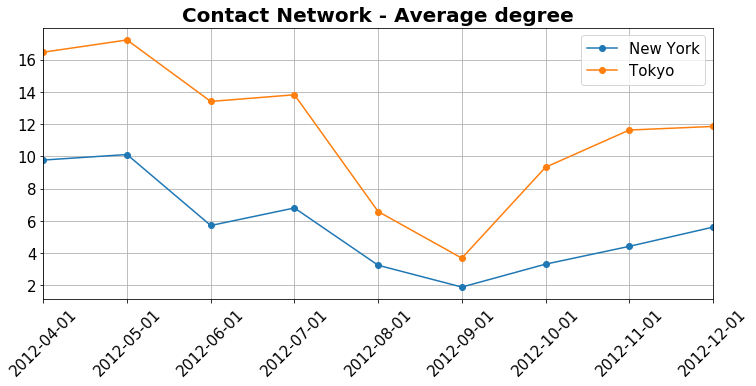

In [77]:
ax = nyc_fmonths2012["mean_degree"].plot(figsize = (12, 5), style = 'o-', rot = 45)
# ax1.grid(True)
# ax1.set_title("New York", fontweight = "bold", fontsize = 20)

tk_fmonths2012["mean_degree"].plot(figsize = (12, 5), style = 'o-', rot = 45)
# ax2.grid(True)
# ax2.set_title("Tokyo", fontweight = "bold", fontsize = 20)

# sp_fmonths2012["mean_degree"].plot(figsize = (12, 5), style = 'o-', rot = 45)
ax.grid(True)
ax.set_title("Contact Network - Average degree", fontweight = "bold", fontsize = 20)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Assortativity

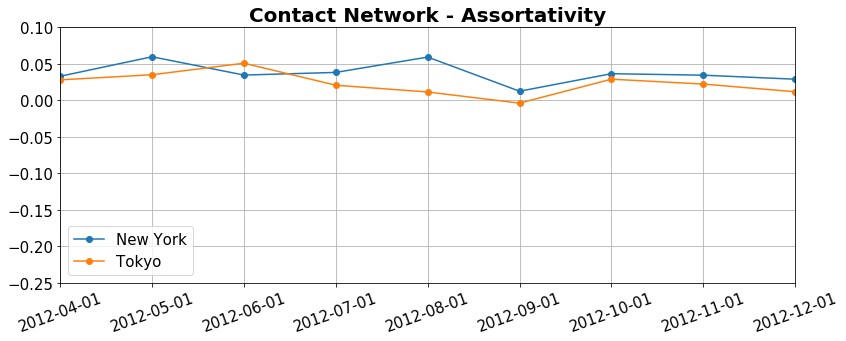

In [29]:
ax = nyc_fmonths2012["assortativity"].plot(figsize = (12, 5), style = 'o-')
# ax1.grid(True)
# ax1.set_title("New York", fontweight = "bold", fontsize = 20)

tk_fmonths2012["assortativity"].plot(figsize = (12, 5), style = 'o-', rot = 20)
# ax2.grid(True)
# ax2.set_title("Tokyo", fontweight = "bold", fontsize = 20)

# sp_fmonths2012["assortativity"].plot(figsize = (12, 5), style = 'o-')
ax.grid(True)
ax.set_title("Contact Network - Assortativity", fontweight = "bold", fontsize = 20)
ax.set_ylim((-0.25, 0.1))

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

plt.tight_layout()
plt.savefig("plots/contact/assortavity_contact.pdf")

### Eccentricity

In [49]:
def get_people_eccentricity(graph, data, k):
    bg     = nf.biggest_component(graph)
    bgraph = graph.subgraph(bg)
    ecc    = nx.eccentricity(bgraph)
        
    dg = sorted([d for n, d in ecc.items()], reverse = True)
    
    degrees = dg[:k]
    
    places = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Ecc"])
    
    for deg in degrees:
        dg_node = [n for n, d in ecc.items() if d == deg][0]
        p = data[data["UserID"] == dg_node].iloc[0, :]
        
        places = places.append({"UserID": p["UserID"], "Latitude": p["Latitude"], "Longitude": p["Longitude"], 
                                "VenueID": p["VenueID"], "VenueName": p["VenueName"], 
                               "Ecc": deg}, ignore_index = True)
        
    return places

In [201]:
nyc_ecc = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Ecc", "Date"])

for date, graph in nyc_gmonths2012:
    p = get_people_eccentricity(graph, nyc_months, k = 5)
    
    for i in range(len(p)):
        nyc_ecc = nyc_ecc.append({"UserID": p["UserID"][i], "Latitude": p["Latitude"][i], 
                                      "Longitude": p["Longitude"][i], "VenueID": p["VenueID"][i], 
                                      "VenueName": p["VenueName"][i], 
                                        "Ecc": p["Ecc"][i], "Date": date}, ignore_index = True)

In [202]:
tk_ecc = pd.DataFrame(columns = ["UserID", "Latitude", "Longitude", "VenueID", "VenueName", "Ecc", "Date"])

for date, graph in tk_gmonths2012:
    p = get_people_eccentricity(graph, tk_months, k = 5)
    
    for i in range(len(p)):
        tk_ecc = tk_ecc.append({"UserID": p["UserID"][i], "Latitude": p["Latitude"][i], 
                                      "Longitude": p["Longitude"][i], "VenueID": p["VenueID"][i], 
                                      "VenueName": p["VenueName"][i], 
                                        "Ecc": p["Ecc"][i], "Date": date}, ignore_index = True)

In [217]:
nyc_ecc

,UserID,Latitude,Longitude,VenueID,VenueName,Ecc,Date
0,1361,40.822383,-74.030170,4ad63d83f964a520f90521e3,Rest Area,13,May 2012
1,1361,40.822383,-74.030170,4ad63d83f964a520f90521e3,Rest Area,13,May 2012
2,1361,40.822383,-74.030170,4ad63d83f964a520f90521e3,Rest Area,13,May 2012
3,1361,40.822383,-74.030170,4ad63d83f964a520f90521e3,Rest Area,13,May 2012
4,172926,40.750516,-73.993499,4ae6363ef964a520aba521e3,Stadium,12,May 2012
5,41937,40.722206,-73.981720,3fd66200f964a52004e51ee3,Theater,20,Sep 2012
6,41937,40.722206,-73.981720,3fd66200f964a52004e51ee3,Theater,20,Sep 2012
7,41937,40.722206,-73.981720,3fd66200f964a52004e51ee3,Theater,20,Sep 2012
8,41937,40.722206,-73.981720,3fd66200f964a52004e51ee3,Theater,20,Sep 2012
9,139332,40.778937,-73.962298,427c0500f964a52097211fe3,Art Museum,19,Sep 2012


In [216]:
tk_ecc

,UserID,Latitude,Longitude,VenueID,VenueName,Ecc,Date
0,8684,35.658517,139.776435,4b46c411f964a520ee2726e3,Subway,10,May 2012
1,8684,35.658517,139.776435,4b46c411f964a520ee2726e3,Subway,10,May 2012
2,8684,35.658517,139.776435,4b46c411f964a520ee2726e3,Subway,10,May 2012
3,32937,35.681004,139.763839,4b267f8af964a520657c24e3,Building,9,May 2012
4,32937,35.681004,139.763839,4b267f8af964a520657c24e3,Building,9,May 2012
5,36034,35.729865,139.710956,4b243a7df964a520356424e3,Train Station,13,Sep 2012
6,36034,35.729865,139.710956,4b243a7df964a520356424e3,Train Station,13,Sep 2012
7,36034,35.729865,139.710956,4b243a7df964a520356424e3,Train Station,13,Sep 2012
8,57483,35.688597,139.710691,4b2692f9f964a520be7d24e3,Subway,12,Sep 2012
9,57483,35.688597,139.710691,4b2692f9f964a520be7d24e3,Subway,12,Sep 2012


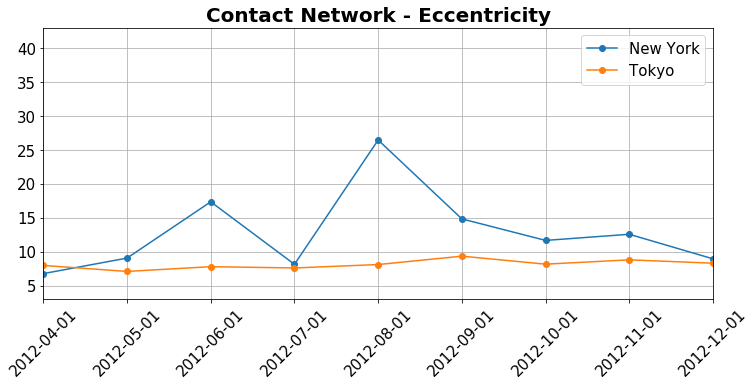

In [215]:
ax = nyc_fmonths2012["mean_eccentricity"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_eccentricity"].plot(figsize = (12, 5), style = 'o-', rot = 45)

#sp_fmonths2012["mean_eccentricity"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Contact Network - Eccentricity", fontweight = "bold", fontsize = 20)
ax.set_ylim(3, 43)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Diameter

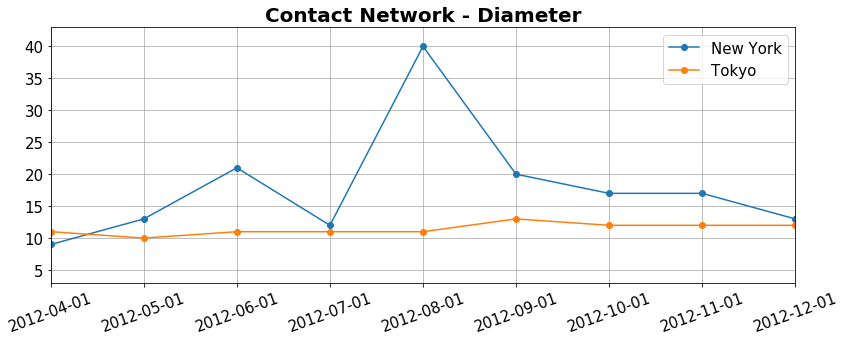

In [32]:
ax = nyc_fmonths2012["diameter"].plot(figsize = (12, 5), style = 'o-', rot = 20)

tk_fmonths2012["diameter"].plot(figsize = (12, 5), style = 'o-', rot = 20)

# sp_fmonths2012["diameter"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Contact Network - Diameter", fontweight = "bold", fontsize = 20)
ax.set_ylim(3, 43)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

plt.tight_layout()
plt.savefig("plots/contact/diameter_contact.pdf")

### Betweenness

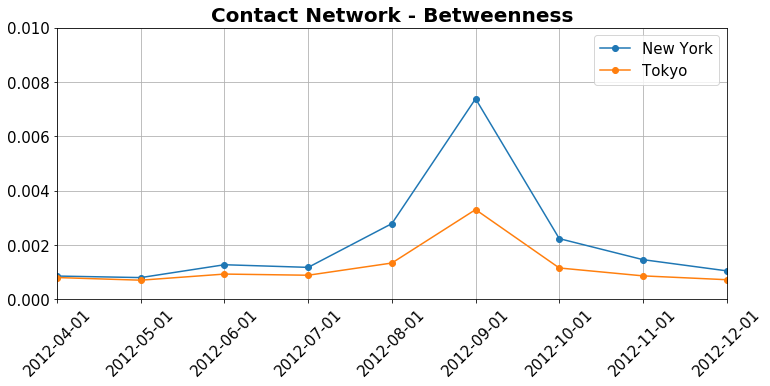

In [228]:
ax = nyc_fmonths2012["mean_betweenness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_betweenness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_betweenness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Contact Network - Betweenness", fontweight = "bold", fontsize = 20)
ax.set_ylim(0, 0.01)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Clustering

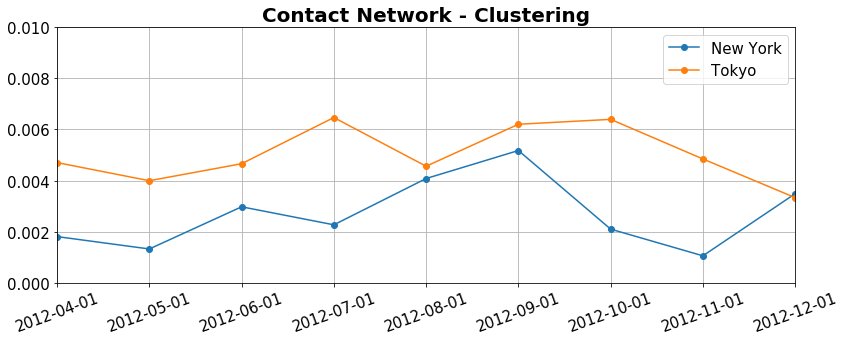

In [31]:
ax = nyc_fmonths2012["mean_clustering"].plot(figsize = (12, 5), style = 'o-', rot = 20)

tk_fmonths2012["mean_clustering"].plot(figsize = (12, 5), style = 'o-', rot = 20)

# sp_fmonths2012["mean_clustering"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Contact Network - Clustering", fontweight = "bold", fontsize = 20)
ax.set_ylim(0, 0.01)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

plt.tight_layout()
plt.savefig("plots/contact/clustering_contact.pdf")

### Closeness

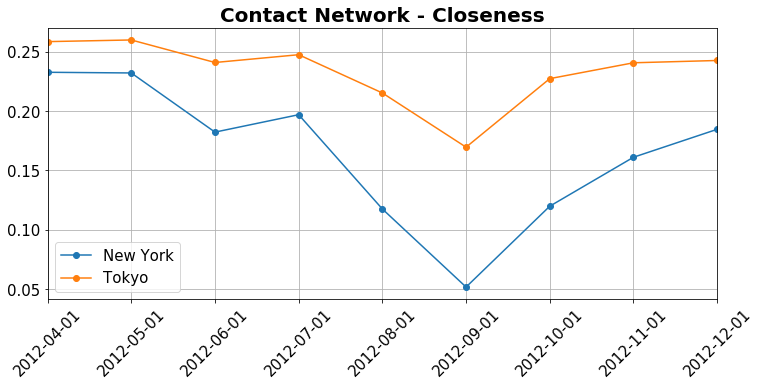

In [225]:
ax = nyc_fmonths2012["mean_closeness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_closeness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_closeness"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Contact Network - Closeness", fontweight = "bold", fontsize = 20)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Eigenvector

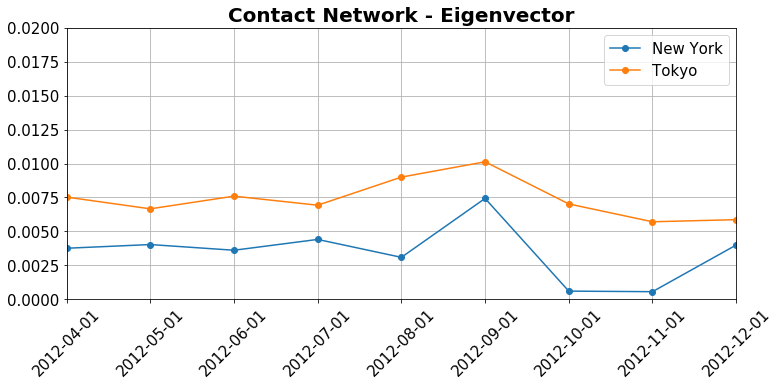

In [234]:
ax = nyc_fmonths2012["mean_eigenvector"].plot(figsize = (12, 5), style = 'o-', rot = 45)

tk_fmonths2012["mean_eigenvector"].plot(figsize = (12, 5), style = 'o-', rot = 45)

# sp_fmonths2012["mean_eigenvector"].plot(figsize = (12, 5), style = 'o-', rot = 45)

ax.grid(True)
ax.set_title("Contact Network - Eigenvector", fontweight = "bold", fontsize = 20)
ax.set_ylim(0, 0.02)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])

### Density

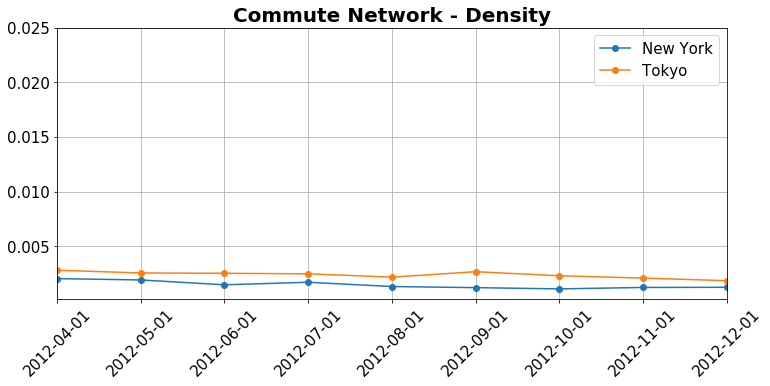

In [122]:
ax = nyc_fmonths2012["density"].plot(figsize = (12, 5), style = 'o-')
# ax1.grid(True)
# ax1.set_title("New York", fontweight = "bold", fontsize = 20)

tk_fmonths2012["density"].plot(figsize = (12, 5), style = 'o-', rot = 45)
# ax2.grid(True)
# ax2.set_title("Tokyo", fontweight = "bold", fontsize = 20)

# sp_fmonths2012["density"].plot(figsize = (12, 5), style = 'o-')
ax.grid(True)
ax.set_title("Commute Network - Density", fontweight = "bold", fontsize = 20)
ax.set_ylim(0.000125, 0.025)

ax.legend(["New York", "Tokyo"])#, "São Paulo"])